# Panda og Seaborn Python biblioteker

In [4]:
import pandas as pd
import seaborn as sns


In [5]:
pingviner = pd.read_csv("pengwings.txt")

In [6]:
pingviner.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [7]:
pingviner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
pingviner["flipper_length_mm"]

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64

In [9]:
pingviner["totalnebb"] = pingviner["bill_length_mm"] + pingviner["bill_depth_mm"]

In [10]:
pingviner

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,totalnebb
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,57.8
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,56.9
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,58.3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,56.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,61.1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,66.1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,60.0


In [11]:
pingviner.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,totalnebb
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,61.073099
std,5.459584,1.974793,14.061714,801.954536,5.351485
min,32.100000,13.100000,172.000000,2700.000000,47.600000
25%,39.225000,15.600000,190.000000,3550.000000,57.300000
50%,44.450000,17.300000,197.000000,4050.000000,60.350000
75%,48.500000,18.700000,213.000000,4750.000000,64.575000
max,59.600000,21.500000,231.000000,6300.000000,76.600000


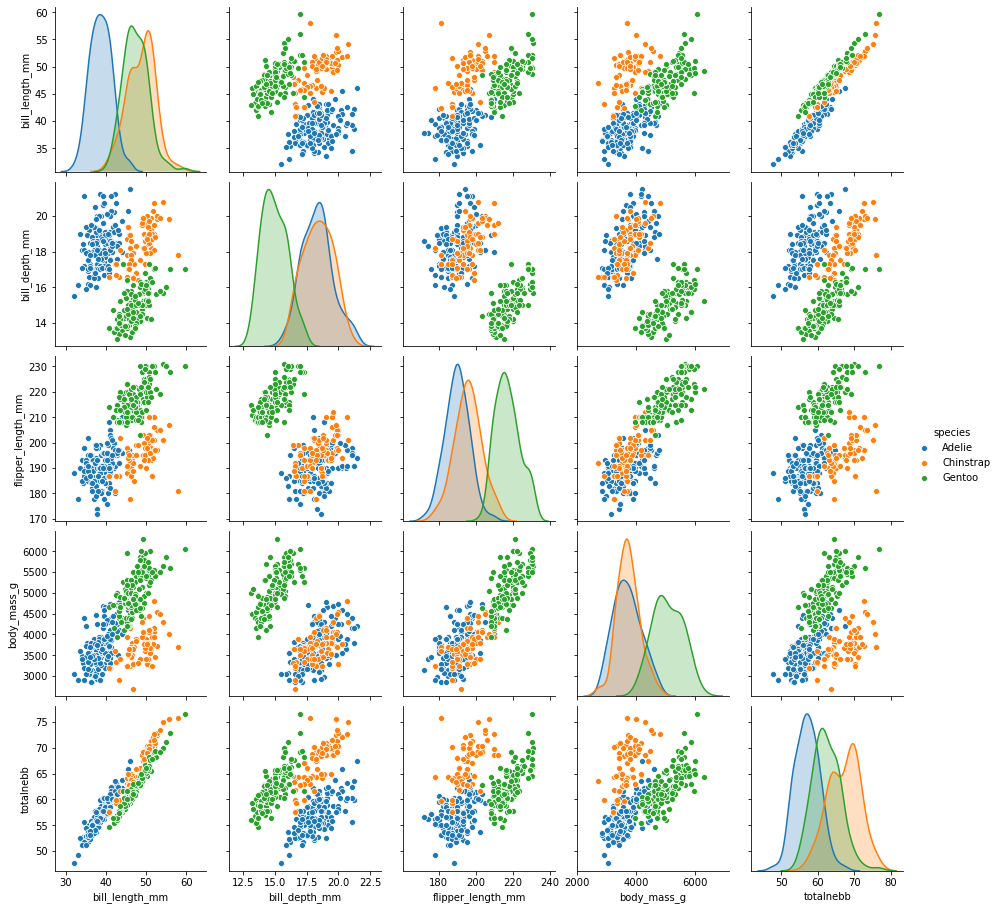

In [13]:
sns.pairplot(pingviner, hue =  "species")

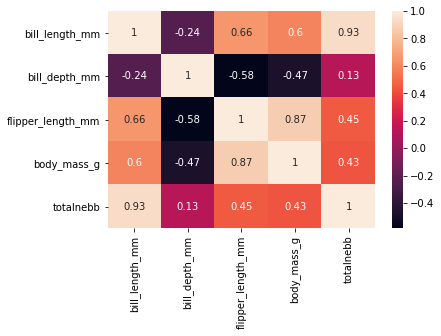

In [16]:
korrelasjon = pingviner.corr()
sns.heatmap(korrelasjon, annot = True)

# Maskinlæring

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix


In [39]:
pingviner.dropna(inplace=True)

In [48]:
kriterier = pingviner[["body_mass_g", "bill_length_mm", "flipper_length_mm", "bill_depth_mm"]]
kategorier = pingviner["species"]

In [49]:
testandel = 0.2 #Bruker 20% av datasettet til å teste
ml_data = train_test_split(kriterier, kategorier, test_size= testandel, random_state=42)

treningskriterier = ml_data[0]
testkriterier = ml_data[1]
treningskategorier = ml_data[2]
testkategorier = ml_data[3]

In [50]:
modell = tree.DecisionTreeClassifier()
modell.fit(treningskriterier, treningskategorier)

DecisionTreeClassifier()

In [51]:
forutsigelser = modell.predict(testkriterier)
accuracy_score(testkategorier, forutsigelser)

0.9850746268656716

In [54]:
modell.predict([[1000,500, 200, 100]])

array(['Chinstrap'], dtype=object)